## Benchmark Ohio Model Against Widmark Equation
We test the standard estimated BAC equation (Widmark Equation) and our model on the Australia dataset to see how they compare.
The equation is as follows:

(A/(w x r)) x 100
- A: ethanol in grams
- w: bodyweight in grams
- r: distribution ratio\
    -male: r = .68\
    -female: r = .55

Assume a constant rate of -0.016 BAC per hour.

[Source](https://alcohol.indianapolis.iu.edu/calculators/bac.html)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [48]:
def calculate_bac(gender_male, weight_grams, ethanol_grams, hours_since_drinking=0):
    if gender_male == 1:
        r = 0.68
    else:
        r = 0.55

    bac = (ethanol_grams) * 100 / (weight_grams * r) - 0.015 * hours_since_drinking
    bac = max(bac, 0)
    bac = round(bac, 4)
    return bac

In [49]:
# load the ohio model
with open('../output/ohio_bac_model.pkl', 'rb') as f:
    ohio_model = pickle.load(f)

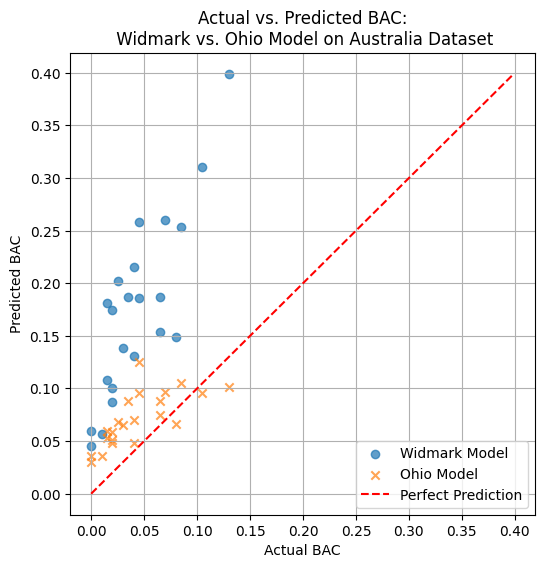

In [60]:
dataset = pd.read_csv('../data/processed/australia_bac_dataset_processed.csv')
widmark_results = []
for index, row in dataset.iterrows():
    gender = row['Gender_male']
    weight = row['Bodyweight_grams']
    ethanol = row['Ethanol_grams']
    bac = calculate_bac(gender, weight, ethanol, hours_since_drinking=1)
    widmark_results.append(bac)

actual_bac = dataset['1hr-BAC']

reformat_dataset = dataset[['Bodyweight_grams', 'Ethanol_grams']]
ohio_results = ohio_model.predict(reformat_dataset)

plt.figure(figsize=(6,6))

# Plot predictions from both models
plt.scatter(actual_bac, widmark_results, label='Widmark Model', alpha=0.7, marker='o')
plt.scatter(actual_bac, ohio_results, label='Ohio Model', alpha=0.7, marker='x')

# Line for perfect prediction
max_val = max(max(actual_bac), max(widmark_results), max(ohio_results))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Labels and legend
plt.xlabel('Actual BAC')
plt.ylabel('Predicted BAC')
plt.title('Actual vs. Predicted BAC:\n Widmark vs. Ohio Model on Australia Dataset')
plt.legend()
plt.grid(True)

plt.savefig('../output/widmark_vs_ohio_actual_vs_predicted.png', dpi=300)

plt.show()
